In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\BCW\BCW_NG_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.0,1.0,1.0,2,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,5.0,7,10.0,3.0,2.0,1.0
2,3.0,1.0,1.0,1.0,2,2.0,3.0,1.0,1.0
3,6.0,8.0,8.0,1.0,3,4.0,3.0,7.0,1.0
4,4.0,1.0,1.0,3.0,2,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.0,1.0,2,1.0,2.0,1.0,1.0
679,2.0,1.0,1.0,1.0,2,1.0,3.0,1.0,1.0
680,5.0,10.0,10.0,10.0,4,10.0,5.0,6.0,3.0
681,1.0,1.0,1.0,3.0,2,1.0,1.0,1.0,1.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	16
float64		column 2	16
float64		column 3	16
float64		column 4	50
int64		column 5	0
float64		column 6	48
float64		column 7	98
float64		column 8	16
float64		column 9	32


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
count,667.000000,667.000000,667.000000,633.000000,683.000000,635.000000,585.000000,667.000000,651.000000
mean,4.460270,3.163418,3.211394,2.710900,3.234261,3.450394,3.396581,2.890555,1.577573
std,2.809705,3.066624,2.991277,2.713683,2.223085,3.592225,2.364113,3.065602,1.701959
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,3.000000,4.000000,5.000000,4.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


<AxesSubplot:>

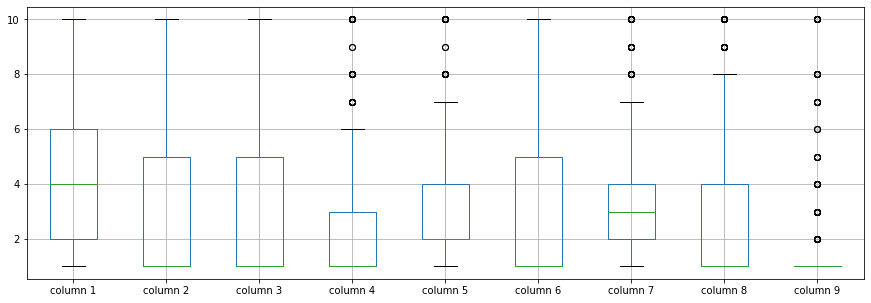

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    4.460270
column 2    3.163418
column 3    3.211394
column 4    2.710900
column 5    3.234261
column 6    3.450394
column 7    3.396581
column 8    2.890555
column 9    1.577573
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
column 1,1.000000,0.640362,0.649316,0.480734,0.515288,0.582668,0.547247,0.525984,0.326778
column 2,0.640362,1.000000,0.906485,0.706130,0.749711,0.678694,0.746450,0.720754,0.468128
column 3,0.649316,0.906485,1.000000,0.687740,0.725757,0.702676,0.723426,0.712461,0.437993
column 4,0.480734,0.706130,0.687740,1.000000,0.596574,0.654131,0.666941,0.633771,0.396614
column 5,0.515288,0.749711,0.725757,0.596574,1.000000,0.578626,0.615569,0.627762,0.491368
column 6,0.582668,0.678694,0.702676,0.654131,0.578626,1.000000,0.662275,0.565935,0.337676
column 7,0.547247,0.746450,0.723426,0.666941,0.615569,0.662275,1.000000,0.674277,0.335591
column 8,0.525984,0.720754,0.712461,0.633771,0.627762,0.565935,0.674277,1.000000,0.432315
column 9,0.326778,0.468128,0.437993,0.396614,0.491368,0.337676,0.335591,0.432315,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [9,9+55,9+55+55,9+55+55,9+55+55+55+55,9+55+55+55+55+55,9+55+55+55+55+55+55,9+55+55+55+55+55,9+55+55+55+55,9+55+55+55,9+55+55,9+55,9], vae_layer = False, seed = 550)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [9]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 34.75134145645868
Epoch: 1 , loss: 34.64836810884022
Epoch: 2 , loss: 33.18036647070022
Epoch: 3 , loss: 31.478950863792782
Epoch: 4 , loss: 30.426448663075764
Epoch: 5 , loss: 30.49498244694301
Epoch: 6 , loss: 29.46571972256615
Epoch: 7 , loss: 29.44527916681199
Epoch: 8 , loss: 28.553399585542223
Epoch: 9 , loss: 28.879735992068337
Epoch: 10 , loss: 27.885535330999467
Epoch: 11 , loss: 27.852303504943848
Epoch: 12 , loss: 27.58242938632057
Epoch: 13 , loss: 27.246945426577614
Epoch: 14 , loss: 27.183525357927596
Epoch: 15 , loss: 26.76636228107271
Epoch: 16 , loss: 27.065928368341353
Epoch: 17 , loss: 26.327278318859282
Epoch: 18 , loss: 26.12133530208043
Epoch: 19 , loss: 26.304733208247594
Epoch: 20 , loss: 25.66600290934245
Epoch: 21 , loss: 26.015035856337775
Epoch: 22 , loss: 25.843074821290514
Epoch: 23 , loss: 26.09262212117513
Epoch: 24 , loss: 26.21975580851237
Epoch: 25 , loss: 25.905354885

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(683, 9)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    3.0
column 2    1.0
column 3    1.0
column 4    1.0
column 5    2.0
column 6    1.0
column 7    2.0
column 8    1.0
column 9    1.0
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\BCW.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
678,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
679,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
680,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
681,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(55.56291713123936, 335.3281974424459)

In [17]:
NRMS=numerator/denominator
NRMS


0.16569712167070563

In [18]:
new_df.iloc[66,:]

column 1    1.0
column 2    3.0
column 3    3.0
column 4    2.0
column 5    2.0
column 6    1.0
column 7    7.0
column 8    2.0
column 9    1.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9
0,5.0,1.0,1.0,1.0,2,1.0,3.0,1.0,1.0
1,5.0,4.0,4.0,5.0,7,10.0,3.0,2.0,1.0
2,3.0,1.0,1.0,1.0,2,2.0,3.0,1.0,1.0
3,6.0,8.0,8.0,1.0,3,4.0,3.0,7.0,1.0
4,4.0,1.0,1.0,3.0,2,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
678,3.0,1.0,1.0,1.0,2,1.0,2.0,1.0,1.0
679,2.0,1.0,1.0,1.0,2,1.0,3.0,1.0,1.0
680,5.0,10.0,10.0,10.0,4,10.0,5.0,6.0,3.0
681,1.0,1.0,1.0,3.0,2,1.0,1.0,1.0,1.0


In [20]:
imputations[-1].to_excel("BCW_NG_5(imp).xlsx", index=False, header=False)